## Public vs. Private Classifier for W2

In [1]:
import pandas as pd
from tqdm import tqdm_notebook
from collections import defaultdict
import seaborn as sns
import matplotlib.pyplot as plt
import scikitplot as skplt
import seaborn as sns

In [2]:
data = pd.read_csv('pub-pri-gt2.csv')

In [3]:
data

,Unnamed: 0,apex,duration,total_scans,mal_scans,ratio_mal,subdomains,keywords,keyword_ratio,avg_depth,avg_entropy,label
0,0,dns-stuff.com,18443856.0,264.0,204.0,0.772727,63.0,0.0,0.000000,0.015873,0.326019,1
1,1,is-very-evil.org,17969215.0,79.0,79.0,1.000000,27.0,0.0,0.000000,0.148148,0.331528,1
2,2,homeunix.net,17825072.0,218.0,99.0,0.454128,92.0,0.0,0.000000,0.032609,0.339779,1
3,3,ddns.name,18435067.0,6336.0,6336.0,1.000000,740.0,1.0,0.001351,0.024324,0.411470,1
4,4,fartit.com,18485132.0,1692.0,1692.0,1.000000,185.0,1.0,0.005405,0.508108,0.417712,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1082,1082,support-instagram.info,30693443.0,91.0,91.0,1.000000,4.0,0.0,0.000000,0.000000,0.000000,0
1083,1083,netflix-personal.com,24132981.0,39.0,39.0,1.000000,3.0,0.0,0.000000,0.000000,0.000000,0
1084,1084,xorelon.tk,16819284.0,30.0,30.0,1.000000,1.0,0.0,0.000000,0.000000,0.000000,0
1085,1085,google-security-dmdbj.club,6504109.0,16.0,16.0,1.000000,1.0,0.0,0.000000,0.000000,0.000000,0


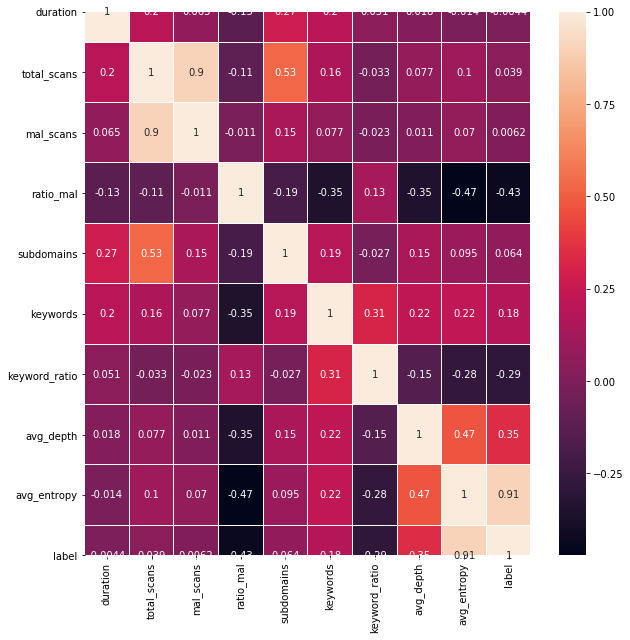

In [4]:
df = data[['duration', 'total_scans', 'mal_scans', 'ratio_mal',
       'subdomains', 'keywords', 'keyword_ratio', 'avg_depth', 'avg_entropy',
       'label']]
plt.figure(figsize=(10,10))
# sns.set(font_scale=1)
sns.heatmap(df.corr(), annot = True ,linewidths=.05)
plt.savefig('public_private_classifier_gt2_corr.png')
plt.show()

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data[['duration', 'total_scans', 'mal_scans', 'ratio_mal',
       'subdomains', 'keywords', 'keyword_ratio', 'avg_depth', 'avg_entropy',
       ]], data.label, test_size = 0.20, random_state = 0)

import warnings
warnings.filterwarnings("ignore")


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from sklearn.metrics import confusion_matrix

classifiers=[['Logistic Regression :',LogisticRegression()],
       ['Decision Tree Classification :',DecisionTreeClassifier()],
       ['Gradient Boosting Classification :', GradientBoostingClassifier()],
       ['Ada Boosting Classification :',AdaBoostClassifier()],
       ['Extra Tree Classification :', ExtraTreesClassifier()],
       ['K-Neighbors Classification :',KNeighborsClassifier()],
       ['Support Vector Classification :',SVC()],
       ['RandomForestClassifier : ',RandomForestClassifier()],      
      ]
cla_pred=[]
for name,model in classifiers:
    model=model
    model.fit(X_train,Y_train)
    predictions = model.predict(X_test)
    cla_pred.append(accuracy_score(Y_test,predictions))
    print(name,accuracy_score(Y_test,predictions),' precision : ',precision_score(Y_test,predictions),' recall : ',recall_score(Y_test,predictions))

Logistic Regression : 0.8486238532110092  precision :  0.9836065573770492  recall :  0.6521739130434783
Decision Tree Classification : 0.9357798165137615  precision :  0.8979591836734694  recall :  0.9565217391304348
Gradient Boosting Classification : 0.9495412844036697  precision :  0.9354838709677419  recall :  0.9456521739130435
Ada Boosting Classification : 0.9174311926605505  precision :  0.8936170212765957  recall :  0.9130434782608695
Extra Tree Classification : 0.963302752293578  precision :  0.9565217391304348  recall :  0.9565217391304348
K-Neighbors Classification : 0.8623853211009175  precision :  0.8163265306122449  recall :  0.8695652173913043
Support Vector Classification : 0.6467889908256881  precision :  0.5483870967741935  recall :  0.9239130434782609
RandomForestClassifier :  0.944954128440367  precision :  0.925531914893617  recall :  0.9456521739130435


In [6]:
RFC = RandomForestClassifier()
from sklearn.model_selection import GridSearchCV

n_estimators = list(range(1,2001,100))
max_depth = list(range(1,2001,100))

hyperparameters = dict(max_depth=max_depth, n_estimators=n_estimators)
h_rfmodel = GridSearchCV(RFC, hyperparameters, cv=5,n_jobs=50, verbose=1)

best_logmodel=h_rfmodel.fit(X_train,Y_train)

print('Best Estimators:', best_logmodel.best_estimator_.get_params()['n_estimators'])
print('Best Max Depth:', best_logmodel.best_estimator_.get_params()['max_depth'])

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


[Parallel(n_jobs=50)]: Using backend LokyBackend with 50 concurrent workers.
[Parallel(n_jobs=50)]: Done 100 tasks      | elapsed:   27.7s
[Parallel(n_jobs=50)]: Done 350 tasks      | elapsed:  1.3min
[Parallel(n_jobs=50)]: Done 700 tasks      | elapsed:  2.5min
[Parallel(n_jobs=50)]: Done 1150 tasks      | elapsed:  4.1min
[Parallel(n_jobs=50)]: Done 1700 tasks      | elapsed:  5.8min
[Parallel(n_jobs=50)]: Done 2000 out of 2000 | elapsed:  6.4min finished


Best Estimators: 801
Best Max Depth: 101


In [7]:
RFC = RandomForestClassifier(max_depth=601, n_estimators=101)
RFC.fit(X_train,Y_train)
predictions_RFC = RFC.predict(X_test)

In [8]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

print('Random Forest',accuracy_score(Y_test,predictions_RFC),' precision : ',precision_score(Y_test,predictions_RFC),' recall : ',recall_score(Y_test,predictions_RFC),'\n')
print(classification_report(Y_test,predictions_RFC))

Random Forest 0.9495412844036697  precision :  0.9263157894736842  recall :  0.9565217391304348 

              precision    recall  f1-score   support

           0       0.97      0.94      0.96       126
           1       0.93      0.96      0.94        92

    accuracy                           0.95       218
   macro avg       0.95      0.95      0.95       218
weighted avg       0.95      0.95      0.95       218



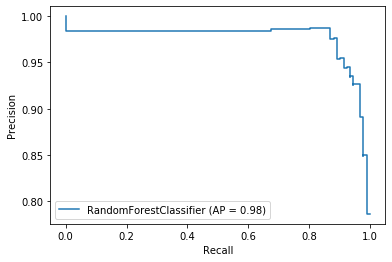

In [9]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

disp = plot_precision_recall_curve(RFC, X_test, Y_test)

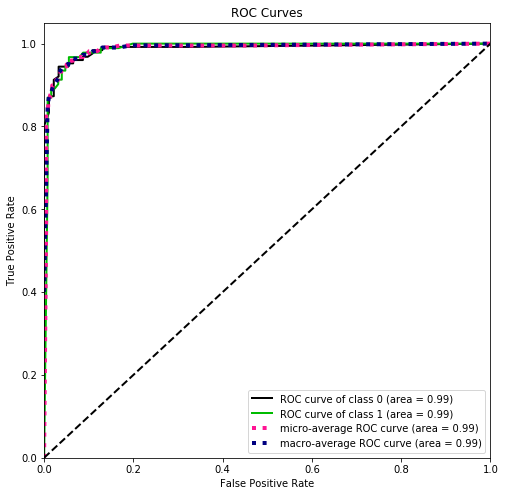

In [10]:
false_positive_rate_RFC, true_positive_rate_RFC, thresholds_RFC = roc_curve(Y_test,RFC.predict_proba(X_test)[:,1])
skplt.metrics.plot_roc_curve(Y_test.values,RFC.predict_proba(X_test), figsize = (8,8))
plt.savefig('public_private_classifier_gt2_rf_roc.png')
plt.show()

Feature ranking:
1. feature 8 - avg_entropy (0.3630697834387905)
2. feature 4 - subdomains (0.27836368323867544)
3. feature 7 - avg_depth (0.14757382266691632)
4. feature 3 - ratio_mal (0.06321340553549572)
5. feature 2 - mal_scans (0.044672852478499954)
6. feature 0 - duration (0.04463749874096831)
7. feature 1 - total_scans (0.0394611836292813)
8. feature 6 - keyword_ratio (0.012592909047902393)
9. feature 5 - keywords (0.006414861223470168)


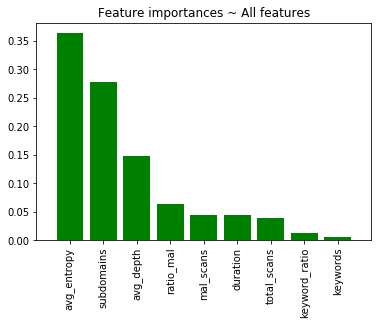

In [11]:
import numpy as np
importances = RFC.feature_importances_
std = np.std([RFC.feature_importances_ for tree in RFC.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
print("Feature ranking:")
Feature = ['duration', 'total_scans', 'mal_scans', 'ratio_mal',
       'subdomains', 'keywords', 'keyword_ratio', 'avg_depth', 'avg_entropy',
       ]
for f in range(X_train.shape[1]):
    print("{}. feature {} - {} ({})" .format(f + 1, indices[f], Feature[indices[f]], importances[indices[f]]))
indiceX = [Feature[i] for i in indices]
plt.figure()
plt.title("Feature importances ~ All features")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indiceX, rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.savefig('public_private_classifier_rf_feature_importances_gt2.png')
plt.show()

In [12]:
import pickle
pickle.dump(RFC,open('public_private_classifier_gt2_rf.pickle','wb'))

In [13]:
ETC = ExtraTreesClassifier()
from sklearn.model_selection import GridSearchCV

n_estimators = list(range(1,2001,100))
# max_depth = list(range(1,2001,100))

hyperparameters = dict(n_estimators=n_estimators)
h_rfmodel = GridSearchCV(ETC, hyperparameters, cv=5,n_jobs=200, verbose=1)

best_logmodel=h_rfmodel.fit(X_train,Y_train)

print('Best Estimators:', best_logmodel.best_estimator_.get_params()['n_estimators'])
# print('Best Max Depth:', best_logmodel.best_estimator_.get_params()['max_depth'])

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=200)]: Using backend LokyBackend with 200 concurrent workers.
[Parallel(n_jobs=200)]: Done   4 out of 100 | elapsed:    3.6s remaining:  1.4min


Best Estimators: 101


[Parallel(n_jobs=200)]: Done 100 out of 100 | elapsed:   19.3s finished


In [14]:
ETC = ExtraTreesClassifier(n_estimators=101)
ETC.fit(X_train,Y_train)
predictions_RFC = RFC.predict(X_test)

In [15]:
print('Extra Trees Classifier',accuracy_score(Y_test,predictions_RFC),' precision : ',precision_score(Y_test,predictions_RFC),' recall : ',recall_score(Y_test,predictions_RFC),'\n')
print(classification_report(Y_test,predictions_RFC))

Extra Trees Classifier 0.9495412844036697  precision :  0.9263157894736842  recall :  0.9565217391304348 

              precision    recall  f1-score   support

           0       0.97      0.94      0.96       126
           1       0.93      0.96      0.94        92

    accuracy                           0.95       218
   macro avg       0.95      0.95      0.95       218
weighted avg       0.95      0.95      0.95       218



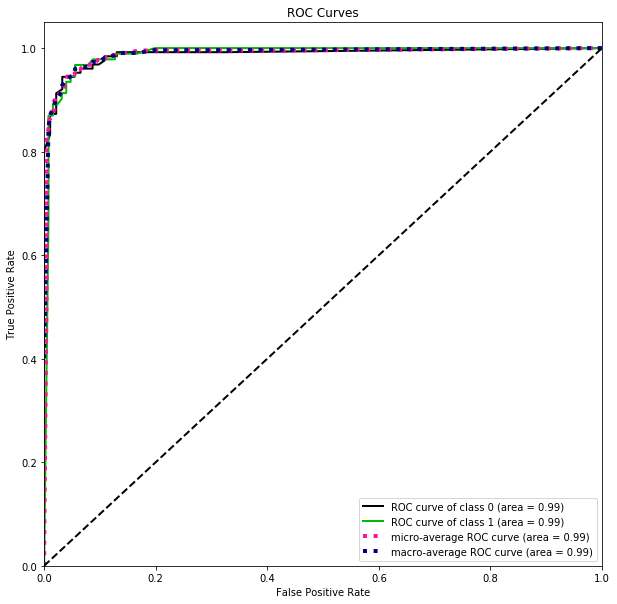

In [16]:
false_positive_rate_RFC, true_positive_rate_RFC, thresholds_RFC = roc_curve(Y_test,RFC.predict_proba(X_test)[:,1])
skplt.metrics.plot_roc_curve(Y_test.values,RFC.predict_proba(X_test), figsize = (10,10))
plt.savefig('public_private_classifier_gt2_et_roc.png')
plt.show()

Feature ranking:
1. feature 8 - avg_entropy (0.3630697834387905)
2. feature 4 - subdomains (0.27836368323867544)
3. feature 7 - avg_depth (0.14757382266691632)
4. feature 3 - ratio_mal (0.06321340553549572)
5. feature 2 - mal_scans (0.044672852478499954)
6. feature 0 - duration (0.04463749874096831)
7. feature 1 - total_scans (0.0394611836292813)
8. feature 6 - keyword_ratio (0.012592909047902393)
9. feature 5 - keywords (0.006414861223470168)


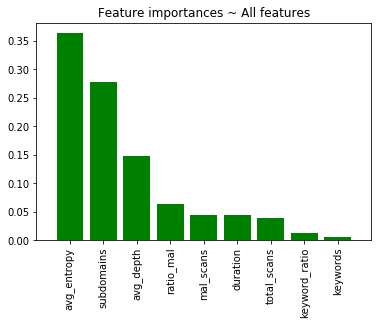

In [17]:
import numpy as np
importances = RFC.feature_importances_
std = np.std([RFC.feature_importances_ for tree in RFC.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
print("Feature ranking:")
Feature = ['duration', 'total_scans', 'mal_scans', 'ratio_mal',
       'subdomains', 'keywords', 'keyword_ratio', 'avg_depth', 'avg_entropy',
       ]
for f in range(X_train.shape[1]):
    print("{}. feature {} - {} ({})" .format(f + 1, indices[f], Feature[indices[f]], importances[indices[f]]))
indiceX = [Feature[i] for i in indices]
plt.figure()
plt.title("Feature importances ~ All features")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indiceX, rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.savefig('public_private_classifier_rf_feature_importances_gt2.png')
plt.show()